# <center><font color=navy> Tutorial #1 Computer- and robot-assisted surgery</font></center>
## <center><font color=navy> Introduction to Jupyter Notebooks</font></center>
<center>&copy; Sebastian Bodenstedt, National Center for Tumor Diseases (NCT) Dresden<br>
    <a href="https://www.nct-dresden.de/"><img src="https://www.nct-dresden.de/++theme++nct/images/logo-nct-en.svg"></a> </center>

You can directly type Python code into a cell and execute it. Pressing Shift + R runs the code in the cell

In [1]:
print("Hello World")

Hello World


Variables between cells are shared. If you assign a value in a cell:

In [2]:
value = 1

You can access it in another cell later on:

In [3]:
print(value)

1


If you modify the value afterwards, you can re-run the above cell and it will reflect this change.

In [4]:
value += 1

You can also define a function in one cell:

In [5]:
def say_hello_to(text):
    print("Hello " + text + "!")

And use it somewhere else:

In [6]:
say_hello_to("World")

Hello World!


Jupyter notebooks have all the functionality provided by a standard python environment, e.g. importing outside libraries and using their functions (Reminder: in Jupyter lab, pressing TAB shows autocompletion options):

In [7]:
import random # library for pseudo-random number generation

r = random.random() # generate pseudo-random number from range [0.0, 1.0)

print(r) # print number


0.08687060208612529


Jupyter can not only run Python commands, it can also execute programs, e.g. wget to download an image from the internet (http://tso.ukdd.de/crs/surgery.png):

In [8]:
!wget http://tso.ukdd.de/crs/surgery.png

--2024-10-29 12:08:11--  http://tso.ukdd.de/crs/surgery.png
Resolving tso.ukdd.de (tso.ukdd.de)... 141.76.248.68
Connecting to tso.ukdd.de (tso.ukdd.de)|141.76.248.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1433466 (1.4M) [image/png]
Saving to: ‘surgery.png’

surgery.png         100%[===================>]   1.37M  --.-KB/s    in 0.09s   

2024-10-29 12:08:11 (15.8 MB/s) - ‘surgery.png’ saved [1433466/1433466]



Commands can also be used to install Python packets, e.g. via pip:

## <center><font color=navy> Introduction to OpenCV and Numpy</font></center>

OpenCV provides mainly functionalities for digital image processing. It can easily be used to load images from disk:

In [9]:
import cv2
import numpy as np

In [10]:
img = cv2.imread("surgery.png")

OpenCV returns a Numpy array, containing the image:

In [11]:
print(img.shape) # Examine the dimensions of the image
print(img.dtype) # Examine the datatype of the image

(1024, 1280, 3)
uint8


Here it can be seen, that the image is a 1280x1024 matrix with 3 channels of type 8-bit integer (range 0...255).The image can then be displayed, e.g. using matplotlib:

In [12]:
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks

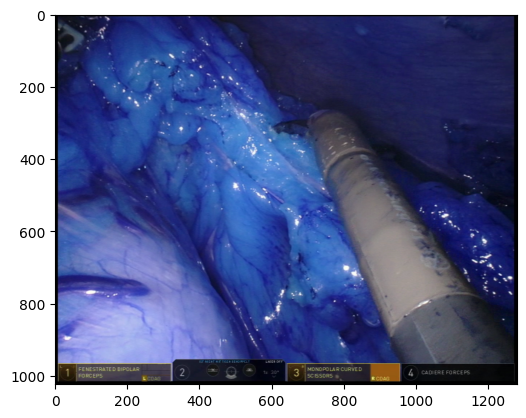

In [13]:
plt.imshow(img)

The resulting image seems to appear rather odd: This is due to OpenCV using a different convention for describing color images. Standard is RGB (red green blue), OpenCV instead uses RGB.
The image can be displayed appropriatly by either converting explicitly to RGB or by flipping an axis:

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
img_rgb2 = img[:,:,::-1] # Flip final axis

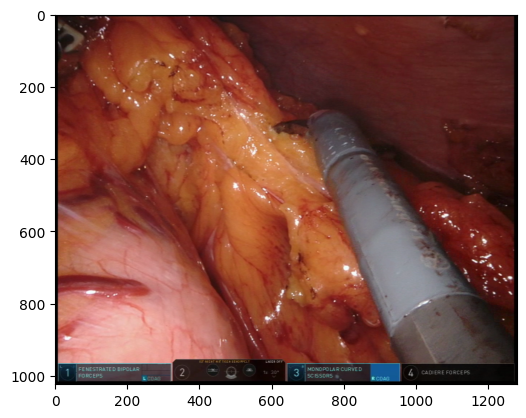

In [15]:
plt.imshow(img_rgb)

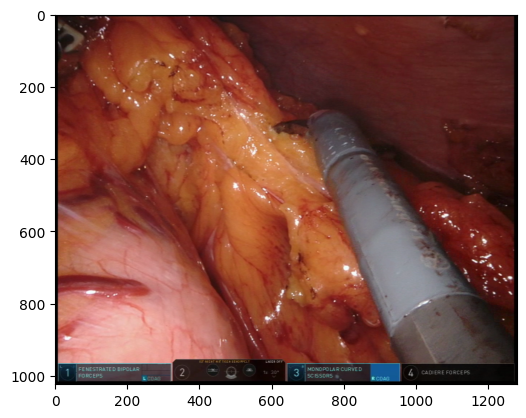

In [16]:
plt.imshow(img_rgb2)

Since the images are numpy arrays, we can perform different indexing operations on a given image, e.g. set the red channel for an image to 0:

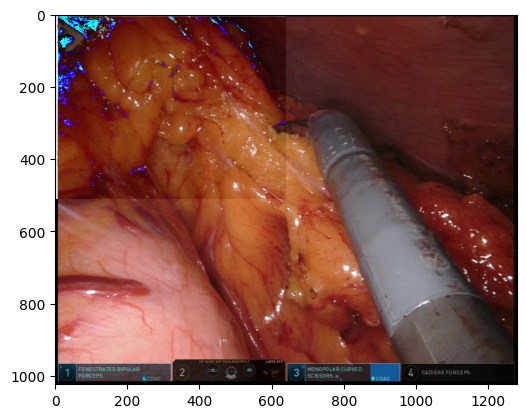

In [17]:
tmp_img = np.copy(img_rgb) # Create a copy of the image
tmp_img[0:512, 0:640, :] -= 20 # Set the red channel to 0

plt.imshow(tmp_img)

or set a column (or range of columns) to white:

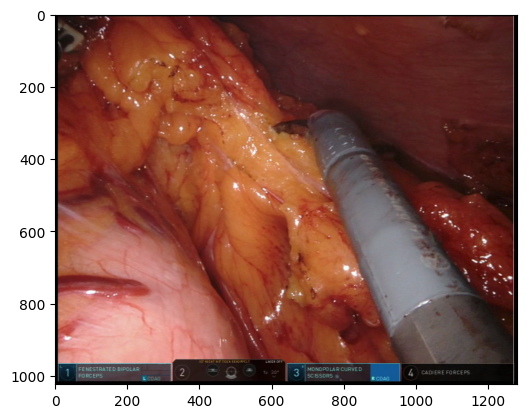

In [18]:
tmp_img = np.copy(img_rgb) # Create a copy of the image
tmp_img[:, -10,:] = 255 # Set column 25 to 255 (white)

plt.imshow(tmp_img)

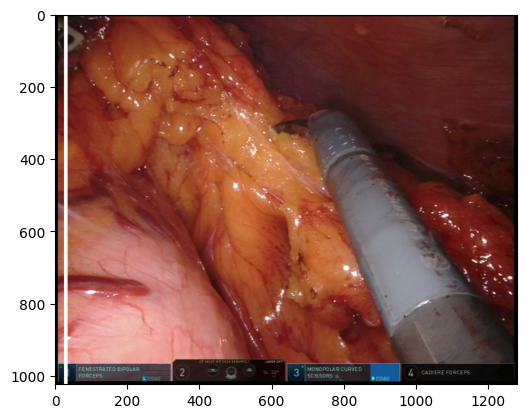

In [19]:
tmp_img = np.copy(img_rgb) # Create a copy of the image
tmp_img[:, 25:35,:] = 255 # Set column 25 through (exclusive) 35 to 255 (white)

plt.imshow(tmp_img)

It is also possible to look at the three color channels of an image separately: 

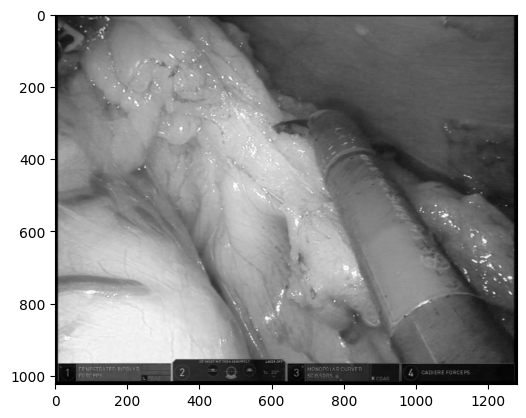

In [20]:
plt.imshow(img_rgb[:,:,0], cmap='gray', vmin=0, vmax=255) # display red channel

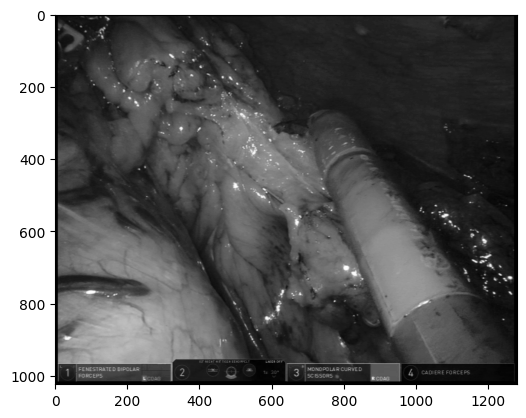

In [21]:
plt.imshow(img_rgb[:,:,1], cmap='gray', vmin=0, vmax=255) # display green channel

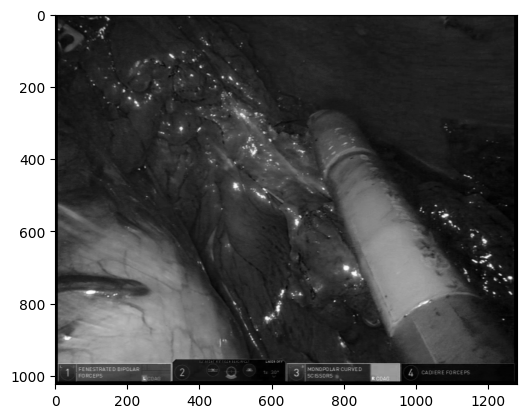

In [22]:
plt.imshow(img_rgb[:,:,2], cmap='gray', vmin=0, vmax=255) # display blue channel

Furthermore, instead of looking at separate channels, indexing can also be used to extract subimages:

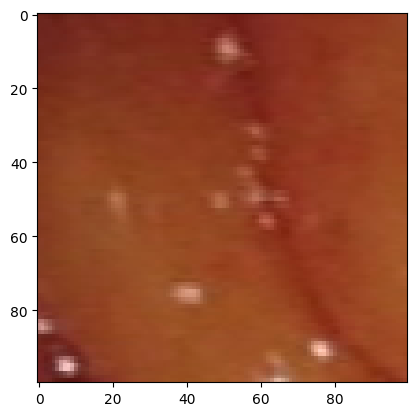

In [23]:
sub_image = img_rgb[100:200, 100:200,:] # extract a 100x100 subimage starting at location 100, 100
plt.imshow(sub_image)

We can also highlight which region was extracted:

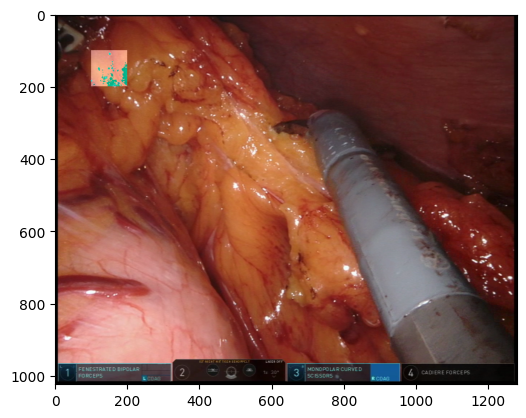

In [24]:
tmp_img = np.copy(img_rgb)
tmp_img[100:200, 100:200,:] += 100

plt.imshow(tmp_img)

Adding a value to a pixel increases its brightness. Though one always has to keep in mind that it is easily possible to overflow an 8-bit integer, i.e. the reason for the green spots in the highlighted region. A simple example:

In [25]:
zeros = np.zeros((10, 10), dtype=np.uint8) # Create an 10x10 matrix using a datatype of 8-bit integer (unsigned) and initialize with zeros
print(zeros)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [26]:
zeros += 255 # Add 255 to the array and print result
print(zeros) 

[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]


In [27]:
zeros += 1 # Add 1 to the array and print result
print(zeros) 

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


NumPy has many functionalities that can help with image processing/data processing overall:

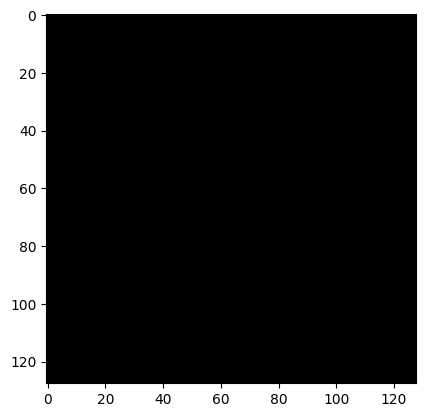

In [28]:
new_img = np.zeros((128, 128, 3), dtype=np.uint8) # Create a 0-initialized 128x128 matrix with 3 channels (8 bit)
plt.imshow(new_img) # Can be interpreted as image

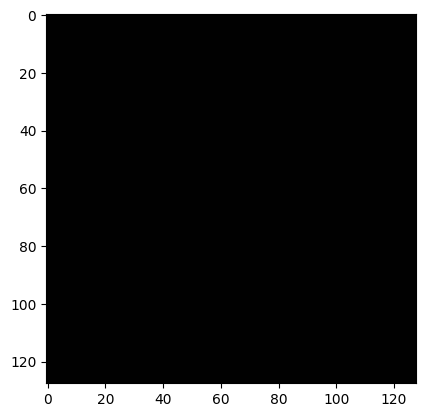

In [29]:
new_img = np.ones((128, 128, 3), dtype=np.uint8) # Create a 1-initialized 128x128 matrix with 3 channels (8 bit)
plt.imshow(new_img) # Can be interpreted as image

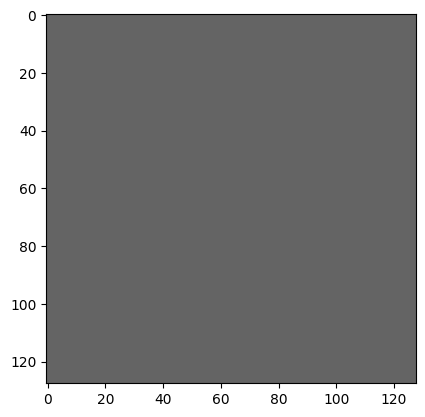

In [30]:
new_img*=100 # Can be multiplied by scalar
plt.imshow(new_img)

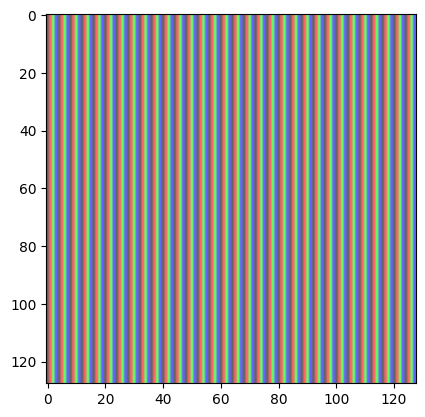

In [31]:
new_img = np.empty((128, 128, 3), dtype=np.uint8) # Create an empty matrix with 3 channels (8 bit)
plt.imshow(new_img)

In [32]:
new_img = np.random.random((128, 128, 3)) # Create a random 128x128 matrix with 3 channels with uniform distribution [0, 1)
print(new_img[0:10, 0:10, 0])
print(new_img.dtype) # Check the data type

[[0.29920704 0.06104064 0.34250432 0.22665449 0.43898742 0.26889689
  0.22438015 0.1130468  0.18055967 0.90469768]
 [0.49683395 0.01051752 0.06319776 0.82667355 0.13790866 0.76603278
  0.68253313 0.52965916 0.7485527  0.97806368]
 [0.15687458 0.37133279 0.63422914 0.49564028 0.23422242 0.87681626
  0.11090797 0.43705336 0.87978153 0.93359328]
 [0.74836315 0.76537426 0.74930937 0.68414748 0.88572841 0.35302756
  0.87091724 0.39300211 0.69185408 0.58288017]
 [0.8089321  0.304868   0.34997594 0.75594506 0.40931177 0.29389382
  0.10707545 0.12915989 0.49918713 0.66025979]
 [0.96979589 0.03940561 0.90724676 0.33418124 0.14451683 0.80661888
  0.91220774 0.61073433 0.13889207 0.1807338 ]
 [0.20131737 0.02083384 0.33906848 0.35123548 0.04578334 0.45277918
  0.27899501 0.17350925 0.37815029 0.81973554]
 [0.87498854 0.40641748 0.99599171 0.35738318 0.94309242 0.7574893
  0.87399771 0.78011    0.6404696  0.43288068]
 [0.08087557 0.52803303 0.94887188 0.84776567 0.2679489  0.86193483
  0.48922086 

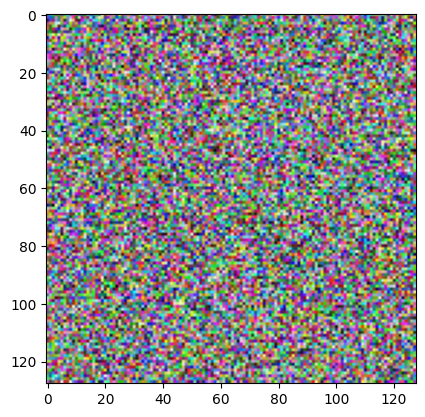

In [33]:
plt.imshow(new_img) # Can be displayed as an image

There are also more advanced modes of indexing data, e.g. using arrays of boolean:

In [34]:
a = np.arange(15) # Create an array with 15 elements (ranging from 0 to 14)
print(a)
a = a.reshape((3, 5)) # Change the shape of the array to 3x5 matrix
print(a)
ind = a == 2 # Find all entries equal to 2

print(ind)
a[ind] = 3 # Repleace all 2's with 3's 
print(a)
ind = a % 3 == 0 # Find all entries divisible by 3
print(ind)
a[ind] = 0 # Replace with 0's
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[False False  True False False]
 [False False False False False]
 [False False False False False]]
[[ 0  1  3  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ True False  True  True False]
 [False  True False False  True]
 [False False  True False False]]
[[ 0  1  0  0  4]
 [ 5  0  7  8  0]
 [10 11  0 13 14]]


True False


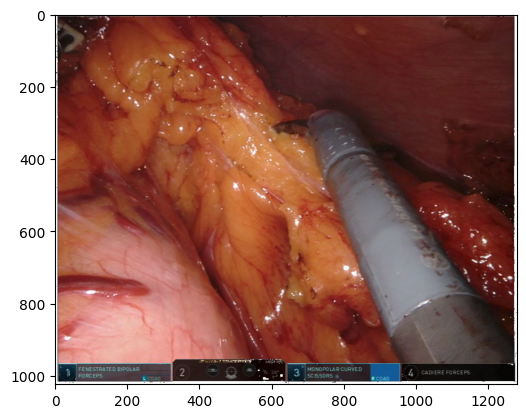

In [35]:
ind = img_rgb == [0, 0, 0] # Find all black pixels
print(ind.any(), ind.all()) # Are any pixels black? Are all black?
img_tmp = np.copy(img_rgb)
img_tmp[ind.any(axis=2),:] = 255 # Set all while pixels to white
plt.imshow(img_tmp)